In [1]:
import qiskit
from qiskit_aer.backends import AerSimulator
import numpy as np
import matplotlib.pyplot as plt


## Exercise 5

In [25]:
def time_evolve(t, dt, w, w0, w1,bit):
    q = qiskit.QuantumRegister(1, name = 'q')
    c = qiskit.ClassicalRegister(1, name = 'c')
    circ = qiskit.QuantumCircuit(q,c)
    
    N = int(t/dt)

    for i in range(N):
         circ.rx(w1*dt*np.cos(w*i*dt)*2,0)
         circ.rz(-w0*dt,0)

    sim = AerSimulator()
    N_shots = 400
    
    circ.measure(q,c)

    result =  sim.run(circ, shots=N_shots).result()
    counts = result.get_counts(circ)


    """ try:
          pass
     except KeyError:
          pass """
    if bit in counts:
     return counts[bit]/N_shots
    else:
       return 0



In [26]:
def population(w,w0,w1,t):
    delta = w-w0
    return w1**2*np.sin(np.sqrt(w1**2+delta**2)*t/2)**2/(w1**2+delta**2)

Measure the population of state |1⟩ using 400 shots for:
(a) different t. You may use the following parameters, w1 = 2, w0 =
25, w = 25.5 for t ∈ [0, 4]. And fix the time step to be δt = 0.05

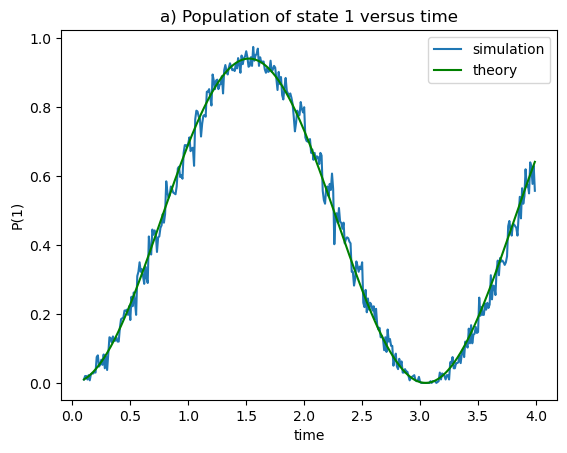

In [27]:
t = np.arange(0.1,4,0.01)
w1 = 2
w0 =25
w = 25.5
dt = 0.05
Pa = []
Pc = []
for tt in t:
    #print(tt)
    Pa.append(time_evolve(tt,dt,w,w0,w1,'1'))
    Pc.append(time_evolve(tt,dt,2,2,2,'1'))


plt.plot(t,Pa, label = 'simulation')
plt.plot(t, population(w,w0,w1,t), label= 'theory', color = "green")
plt.xlabel('time')
plt.ylabel('P(1)')
plt.title('a) Population of state 1 versus time')
plt.legend()
plt.savefig("a.png")

(c) Try also ω = ω0 = ω1 = 2. Compare to the analytic solution and
explain your findings.

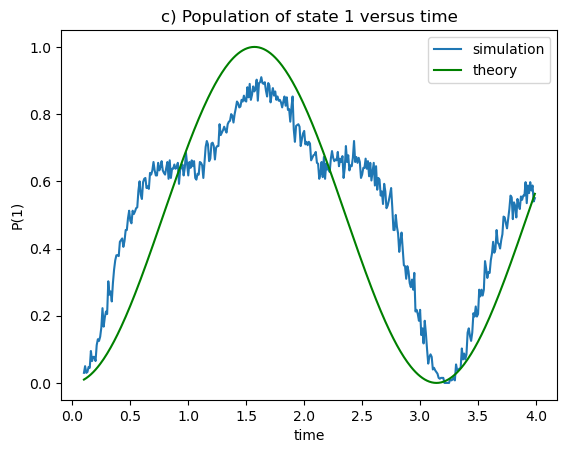

In [28]:
plt.plot(t,Pc, label = 'simulation')
plt.plot(t, population(2,2,2,t), label= 'theory', color = "green")
plt.xlabel('time')
plt.ylabel('P(1)')
plt.title('c) Population of state 1 versus time')
plt.legend()
plt.savefig("c.png")

The reason why the simulation is not compatible with the theory is because given these frequencies the rotating wave approximation is not optimal, for it to work well we need w0, w >> w1 (check)

(b) different detunings ∆ (Vary ω ∈ [10, 40], at t = π/ω1)
Plot your measurement results against the solution from Exercise 4.

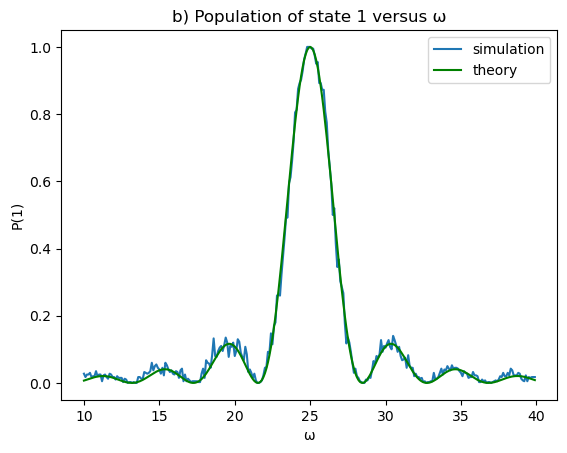

In [7]:
w = np.arange(10,40,0.1)
Pb = []
t = np.pi/w1
for ww in w:
    Pb.append(time_evolve(t,dt,ww,w0,w1,'1'))

plt.plot(w,Pb, label = 'simulation')
plt.plot(w, population(w,w0,w1,t), label= 'theory', color = "green")
plt.xlabel('ω')
plt.ylabel('P(1)')
plt.legend()
plt.title('b) Population of state 1 versus ω')
plt.savefig('b.png')

## Exercise 6

Add noise to the simulator AerSimulator() to perform
the time evolution in Exercise 5 in a noisy environment. The GAD can
be implemented by
amplitude damping error(gamma, p).
Use the method add all qubit quantum error() to specify the noise
so that Qiskit will automatically implement a GAD after every single-
qubit gate in the circuit. You may use the values p = 0.1 and γ = 0.02
and the same parameters from 5(a), and plot your noisy result against
what you obtained from Exercise 5(a). For a large enough time span,
you should observe a decay time scale for |1⟩ signal (sometimes called
T1).
Run the same measurements with a smaller time step δt = 0.01 and
the same time span, what do you observe? Explain your finding.

In [8]:
from qiskit_aer.noise import NoiseModel, amplitude_damping_error

In [9]:
def noisy_time_evolve(t, dt, w, w0, w1, p, gamma, bit):
    q = qiskit.QuantumRegister(1, name = 'q')
    c = qiskit.ClassicalRegister(1, name = 'c')
    circ = qiskit.QuantumCircuit(q,c)

    noise = NoiseModel()
    error = amplitude_damping_error(gamma, p)
    noise.add_all_qubit_quantum_error(error, ['rx', 'rz'])
    #noise.add_all_qubit_quantum_error(error, ['rz'])

    
    N = int(t/dt)

    for i in range(N):
         circ.rx(w1*dt*np.cos(w*i*dt)*2,0)
         circ.rz(-w0*dt,0)

    sim = AerSimulator(noise_model = noise)
    N_shots = 400
    
    circ.measure(q,c)

    result =  sim.run(circ, shots=N_shots).result()
    counts = result.get_counts(circ)


    """ try:
          pass
     except KeyError:
          pass """
    if bit in counts:
     return counts[bit]/N_shots
    else:
       return 0

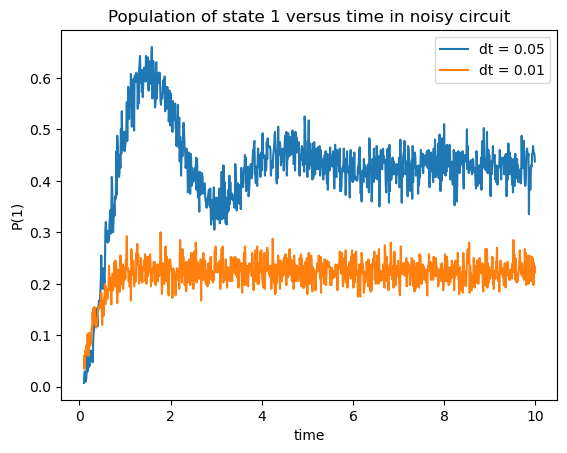

In [10]:
import pickle

t = np.arange(0.1,10,0.01)
w1 = 2
w0 =25
w = 25.5
dt = 0.05
dtnew = 0.01
p = 0.1
gamma = 0.02
P6 = []
P6new = []
P5a = []
for tt in t:
    #print(tt)
    P5a.append(time_evolve(tt,dt,w,w0,w1,'1'))
    P6.append(noisy_time_evolve(tt,dt,w,w0,w1,p,gamma,'1'))
    P6new.append(noisy_time_evolve(tt,dtnew,w,w0,w1,p,gamma,'1'))

# Save the list to a file
with open('P6.pkl', 'wb') as file:
    pickle.dump(P6, file)

with open('P6new.pkl', 'wb') as file:
    pickle.dump(P6new, file)

""" Load the list from the file
with open('my_list.pkl', 'rb') as file:
    loaded_list = pickle.load(file)
"""


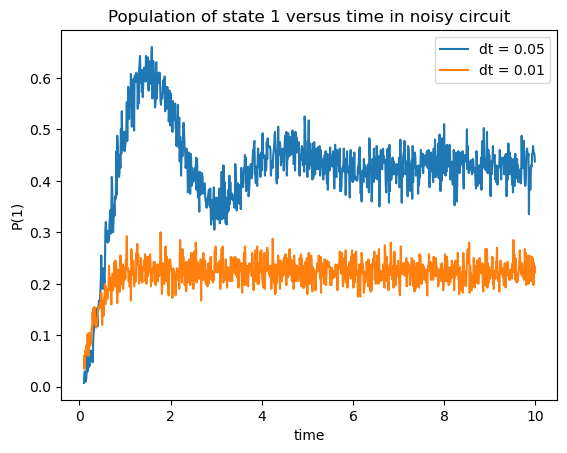

In [23]:
t = np.arange(0.1,10,0.01)   
plt.plot(t,P6, label = 'dt = 0.05')
plt.plot(t,P6new, label = 'dt = 0.01')
plt.xlabel('time')
plt.ylabel('P(1)')
plt.legend()
plt.title('Population of state 1 versus time in noisy circuit')
plt.savefig("ex6b.png")

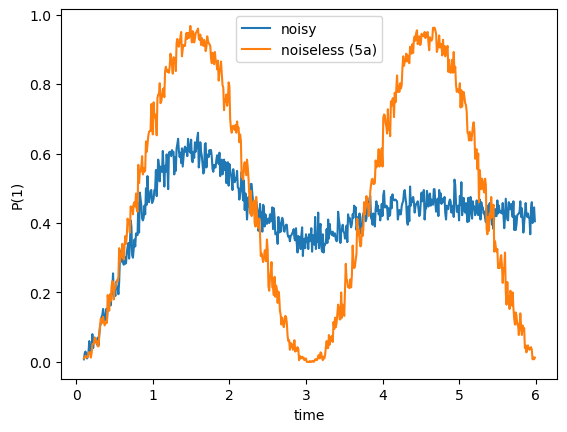

In [22]:
t = np.arange(0.1,6,0.01)   
plt.plot(t,P6[:len(t)], label = 'noisy')
plt.plot(t,P5a[:len(t)], label = 'noiseless (5a)')
plt.xlabel('time')
plt.ylabel('P(1)')
plt.legend()
plt.savefig("ex6a.png")

In the case of smaller dt we insert more noise in the time evolution, because there are more gates so the probability of error is higher -> it decays more quickly

## Ex 7)

Repeat 5(a) using the fake machine backend
from qiskit.providers.fake provider import Fake5QV1
for time t ∈ [0, 10]. This performs the experiment using realistic noise
models from the device Vigo. Compare your result to Exercise 6.
In this practical we will not attempt to mitigate such errors, in fact, error mitigation for such type is in general very subtle for more than a few qubits. It is
however important to understand how these errors can affect your measurement
result if your program is run on an actual device!

In [13]:
from qiskit.providers.fake_provider import Fake5QV1

def realnoisy_time_evolve(t, dt, w, w0, w1, p, gamma, bit):
    q = qiskit.QuantumRegister(1, name = 'q')
    c = qiskit.ClassicalRegister(1, name = 'c')
    circ = qiskit.QuantumCircuit(q,c)
    
    N = int(t/dt)

    for i in range(N):
         circ.rx(w1*dt*np.cos(w*i*dt)*2,0)
         circ.rz(-w0*dt,0)

    fake = Fake5QV1()
    noise = NoiseModel.from_backend(fake)
    sim = AerSimulator(noise_model = noise)
    N_shots = 400
    
    circ.measure(q,c)

    result =  sim.run(circ, shots=N_shots).result()
    counts = result.get_counts(circ)


    """ try:
          pass
     except KeyError:
          pass """
    if bit in counts:
     return counts[bit]/N_shots
    else:
       return 0

Text(0, 0.5, 'Population of |1>')

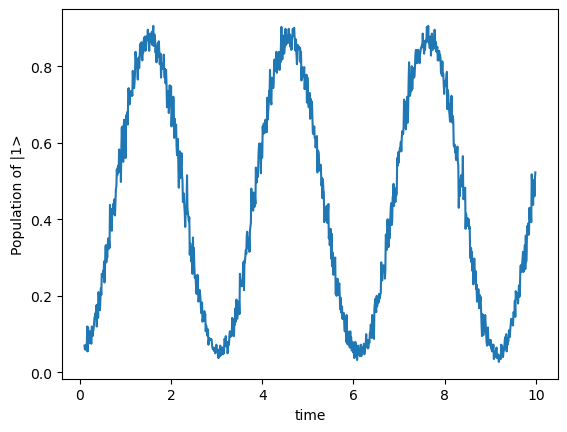

In [14]:
w1 = 2
w0 =25
w = 25.5
dt = 0.05
dtnew = 0.01
p = 0.1
gamma = 0.02

t = np.arange(0.1,10,0.01)
P7 = []
for tt in t:
    #print(tt)
    P7.append(realnoisy_time_evolve(tt,dt,w,w0,w1,p,gamma,'1'))

plt.plot(t,P7)
plt.xlabel('time')
plt.ylabel('Population of |1>')

In [15]:
with open('P7.pkl', 'wb') as file:
    pickle.dump(P7, file)

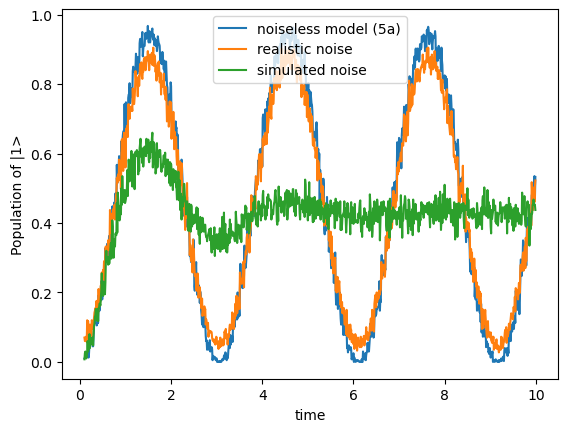

In [19]:
#Pa = []
#for tt in t:
#    #print(tt)
#    Pa.append(time_evolve(tt,dt,w,w0,w1,'1'))

#plt.scatter(t,P5a, label = 'noiseless', s = 6)
#plt.scatter(t,P7, label = 'noisy 7', s = 6)
#plt.scatter(t,P6, label = "noisy 6", s = 6)

plt.plot(t,P5a, label = 'noiseless model (5a)')
plt.plot(t,P7, label = 'realistic noise')
plt.plot(t,P6, label = 'simulated noise')

plt.xlabel('time')
plt.ylabel('Population of |1>')
plt.legend()
plt.savefig("ex7new.png")